# Predicting Gender

Introduction:-

In this notebook, I'm going to do an end to end project of Machine Learning in which we will take height(in feet) and weight(in kgs) as an input and will predict the gender of that particular person. I'm going to go over a basic Machine Learning pipeline from start to finish to show what a typical data science workflow looks like.
    
The dataset for this project was collected from Kaggle.com.The dataset contains three columns one weight one of height and labeled as male and female as the third column. The shape of the dataset is (10000,3).

In this project i have used 4 Machine learning algorithm.

-KNN

-Random forest

-Decision Tree

-Logistic Regression

For the purposes of this project, the following preprocessing steps have been made to the dataset:

    -The 7 rows of data with a value of [ 994, 1317, 2014, 2014, 3285, 3757, 6624, 9285, 9285] which is totally different from the dataset. These data point can be considered as outliers and has been removed.
    
    -The given data of height and weight were in a unit of centimeter and pound which is not popular in India so these data points are converted to units that are popular in India which is kilogram and feet.
    
    

To test this I have deployed my model in flask framework using heruko environment.

link  to test my model is-

https://genderpridiction-api.herokuapp.com

Go check out my model.

# Link to my 
genderpridiction-api.herokuapp.com

# Required libraries

Numpy:- Provides a fast numerical array structure and helper functions.

pandas:-  Provides a DataFrame structure to store data in memory and work with it easily and efficiently.

Matplotlib:- Basic plotting library in Python; most other Python plotting libraries are built on top of it.

seaborn:- Advanced statistical plotting library.

scikit-learn: The essential Machine Learning package in Python.

pickle:-Python pickle module is used for serializing and de-serializing a Python object structure.

In [2]:
#Importing necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Checking the data

Now we i have used pandas to load the data and i will analyse that -

Is there anything wrong with the dataset 

Do I need to fix or remove any of the data

Lets see:-

In [3]:
#Importing data
data=pd.read_csv('weight-height.csv')
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


Checking missing value in the Data

In [12]:
data.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

As we see the data does not contain any nan values which is pretty much good hence we can move forward with the data.

Seperating the input and output variables and storing in X and Y 

In [17]:
X=data.iloc[:,[1,2]]
y=data.iloc[:,0]


 Detecting Outliers

-The 7 rows of data with a value of [ 994, 1317, 2014, 2014, 3285, 3757, 6624, 9285, 9285] which is totally different from the dataset. These data point can be considered as outliers and has been removed.

In [18]:

from scipy import stats
z = np.abs(stats.zscore(X))
print(z)
threshold = 3
print(np.where(z > 3))
new_data = data[(z < 3).all(axis=1)]
new_data

[[1.94406149 2.50579697]
 [0.62753668 0.02710064]
 [2.01244346 1.59780623]
 ...
 [0.64968792 1.02672965]
 [0.69312469 0.07512745]
 [1.14970831 1.48850724]]
(array([ 994, 1317, 2014, 2014, 3285, 3757, 6624, 9285, 9285], dtype=int64), array([0, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64))


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


The given data of height and weight were in a unit of centimeter and pound which is not popular in India so these data points are converted to units that are popular in India which is kilogram and feet.

In [20]:
height=X["Height"]/12
weight=X['Weight']*0.453592
df = pd.DataFrame(height) 
df2 = pd.DataFrame(weight) 
frames=[df,df2]
X = pd.concat(frames,axis=1)
frames=[df,df2]
X = pd.concat(frames,axis=1)

In [95]:
#Seperating Male and Female Data
data1=new_data[new_data['Gender']=='Male']
data2=new_data[new_data['Gender']=='Female']

In [116]:
data1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
4995,Male,68.860062,177.131052
4996,Male,68.973423,159.285228
4997,Male,67.013795,199.195400
4998,Male,71.557718,185.905909


# Exploratory analysis

Data need to be consistent if the data is not consistent our model will act as a biased model hence through a histogram we explored that our data is consistent

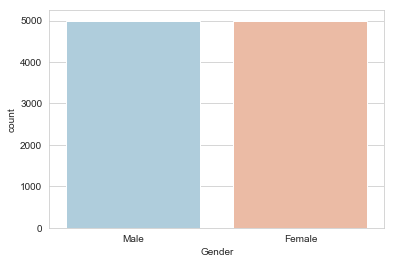

In [99]:
sns.set_style('whitegrid')
sns.countplot(x='Gender',data=new_data,palette='RdBu_r')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DFE9A335C0>,
      dtype=object)

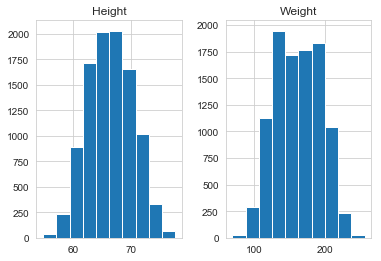

In [100]:
new_data.hist()

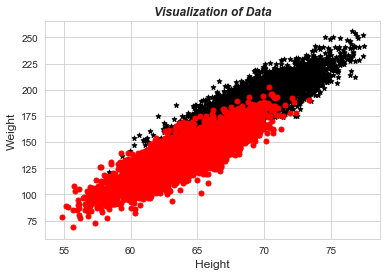

In [101]:
data1=new_data[new_data['Gender']=='Male']
data2=new_data[new_data['Gender']=='Female']
plt.scatter(data1['Height'],data1['Weight'],color='K',s=25,marker='*') #All the data with Y=1,represented by Black,Admitted
plt.scatter(data2['Height'],data2['Weight'],color='R',s=25,marker='o') # All data with Y=0 ,represented by Red,Rejected
plt.title('Visualization of Data',fontsize=12,style='italic',fontweight='bold')
plt.xlabel('Height',fontsize=12)
plt.ylabel('Weight',fontsize=12)
plt.show()

# Data Processing

Now again I have separated the data in X and Y because after removing the outlier the data is change.

In [166]:
X.values
y=new_data.iloc[:,0].values


 After exploring the dataset, I observed that I need to convert some string variables into categorical variables  before training the Machine Learning models.
First, I'll use Label encoder` method to create dummy columns for categorical variables.

I have not used "get_dummies" function because it was making two diffrent columns of male and female which futhure can need more data preocessing to get rid of that i simply used label encoder.
After encoding it has converted 

Male as 1

and

Female as 0

In [28]:
from sklearn.preprocessing import LabelEncoder  # Encoding library call
enc = LabelEncoder()
label_encoder = enc.fit(y)
label_encoder
Y = label_encoder.transform(y)
Y

array([1, 1, 1, ..., 0, 0, 0])

Shuffle and Split Data

Now we'll take the height and weight dataset and split the data into training and testing subsets. 

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


By spitting a dataset into training and testing subsets, we can train our model on the training subset, and then feed it with unseen data from the test subset to evaluate the performance of our model.

# Developing a Model

In this section of the project, we will develop the tools and techniques necessary for a model to make a prediction.
In this project I have used 4 Machine learning algorithms.

-KNN

-Logistic Regression

-Random forest

-Decision Tree

I have used a grid search to get the best parameters 

To test the accuracy of the model I have used k-fold Cross-Validation.10-fold cross-validation is the most common choice, so let's use that here.

We can perform 10-fold cross-validation on our model with the following code:
    
    I have used it on KNN to just get an idea before considering it as a model.

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = 14)
    score=cross_val_score(knn_classifier,X_train,Y_train,cv=10)
    knn_scores.append(score.mean())
score.mean()

0.906031463286582

 The accuracy on train data of KNN model is 91% which is pretty much good but let us have a look at the accuracy of our second model which is

Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty = 'l2', solver='sag',multi_class='multinomial',class_weight='balanced',random_state=42,max_iter=500)  #solver=lbfgh is gradient decent
clf.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=500,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=42, solver='sag', tol=0.0001, verbose=0,
          warm_start=False)

In [47]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, Y_train, cv=10, scoring="accuracy").mean()

0.9183758855482587

In [48]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_test, Y_test, cv=10, scoring="accuracy").mean()

0.9230517637940949

The accuracy on train data of Logistic Regression  model is 91%

The accuracy on test data of Logistic Regression  model is 92%
which is almost same as our previous model, let us have a look at the accuracy of our third model which is

Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=250,criterion = 'entropy',max_depth=7, min_samples_split = 7)
rnd_clf.fit(X_train, Y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [52]:
from sklearn.model_selection import cross_val_score
cross_val_score(rnd_clf, X_train, Y_train, cv=10, scoring="accuracy").mean()

0.916750259766031

In [53]:
from sklearn.model_selection import cross_val_score
cross_val_score(rnd_clf, X_test, Y_test, cv=10, scoring="accuracy").mean()

0.9270366884172105

The accuracy on train data of Random Forest model is 91% 

The accuracy on test data of Random Forest model is 92%

which is almost same as our previous model, let us have a look at the accuracy of our fourth model which is

DecisionTreeClassifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier= DecisionTreeClassifier(max_depth=4,criterion = 'gini',min_samples_leaf = 1,min_samples_split= 2, max_leaf_nodes = 10)

score=cross_val_score(DecisionTreeClassifier,X_train,Y_train,cv=10)
score.mean()

0.9105008812513768

In [55]:
score=cross_val_score(DecisionTreeClassifier,X_test,Y_test,cv=10)
score.mean()

0.9230316132903322

# Summary :-
    
As we have finished training our 4 model what we have analysed is that the accuracy summary of the 4 model is

-KNN--91.74%

-Random forest-91.67%

-Decision Tree-91.05%

-Logistic Regression-91.83%

So the accuracy is almost same in each case now I would like to choose Random forest Classifier model beacause in all the 4 model the test accuracy is highest
in Random forest model which is  92.70%.
This finishes our project. We have built a RandomForestClassifier that performs reasonably well.


But should the model should be used in a real-world setting? 

To test this I have deployed my model in flask framework using heruko environment.

API link  to test my model is-

genderpridiction-api.herokuapp.com

After putting your model in front of the world i can say that the model should not be used in a real-world  because-
 -The data collected is not really relevant in environment of India.
 -The dataset is actually small to apply an alogrithm to real world.
 -The features present in the data that we built our model on are not likely be sufficient to describe the proper gender of male based on height and weight.


But after completing this project I have learnt how to do a end to end data science from collecting data to deploying our model in real world environemt.

You can test my model [here](https://genderpridiction-api.herokuapp.com)

Now lets save our model to a pkl file for the deployment where my model will be tested in real environment.


In [169]:
# Saving model to disk
pickle.dump(rnd_clf, open('model.pkl','wb'))

In [177]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[5.75,73.93]]))

[0]
